# <font color='green'>Lead Scoring Case Study</font>

## <font color='Red'> Problem Statement </font>

### XEducation markets its courses on several websites and search engines. Once people land on their website some browse the courses, watch videos and some even fill the form. Upon filling the forms, the company gets their details like number, mail id with which the employees later approch these people to market their courses, while some do covert into customers but many do not. This creates very poor rate of conversion for the company.

## <font color='Red'> Objective </font>

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# Importing Libraries

In [448]:
#import the warnings.
import warnings
warnings.filterwarnings('ignore')

# Data display customization
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# 1. Reading and understanding data

In [449]:
df0 = pd.read_csv("Leads.csv")
df0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [450]:
df0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [451]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [452]:
#check the statistics of dataframe
df0.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [453]:
#check null values in each column in dataframe
df0.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [454]:
# Duplicate check
df0.loc[df0.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [455]:
# Checking the original conversion rate
(df0.Converted.sum()/len(df0.Converted)*100)

38.53896103896104

## Observation

- The shape of leads dataset is 9240 rows and 37 columns.
- There are 7 numerical columns and 30 categorical columns, made the lead number as the index, for giving a rank later on.
- There are many 'Select' values present in various columns in the dataset. These values correspond to the user having not made any selection.
- There are missing/null values in many columns.
- There are no duplicate values in the dataset.
- The original conversion rate wad 38.5%.


# 2. Data Cleaning

In [456]:
#Replacing 'Select' with NaN since the customer has not selected any options for these columns while entering the data.
df0.replace('Select', np.nan, inplace = True)

In [457]:
df0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [458]:
# Checking the columns if they have only 1 value though out, so that they can be dropped.
df0.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [459]:
# dropping unique valued columns
df0.drop(['Magazine', 'Receive More Updates About Our Courses', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], 1, inplace = True)

In [460]:
# dropping Prospect ID as each value is null
df0.drop(['Prospect ID'],1, inplace = True)

In [461]:
df0.nunique()

Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [462]:
df0.isnull().mean()*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.0000

### Dropping columns with more than 40% null values.

In [463]:
df0 = df0.loc[:,df0.isnull().mean() <= 0.40]
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [464]:
df0.isnull().mean()*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

### Still There are null values, lets handle each column individually

In [465]:
# Fixing city column
df0.City.value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [466]:
# Since 57% of the vslues are Mumbai and the 2nd highest is 13 %==, we can append the missing values with Mumbai.
df0.City.replace(np.nan, 'Mumbai', inplace = True)

In [467]:
df0.isnull().mean()*100

Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [468]:
# Fixing Tags column
df0.Tags.value_counts(normalize = True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [469]:
# These tags are added by the XED team, and are not imposrtant, hence dropping them.
df0.drop(['Tags'], 1, inplace = True)

In [470]:
# Fixing What matters most to you in choosing a course column
df0['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [471]:
# Since more than 99% values are the same, we can drop the column as it wont really help us with EDA and model building
df0.drop(['What matters most to you in choosing a course'], 1, inplace = True)

In [472]:
# Fixing What is your current occupation
df0['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [473]:
# Since 85% values are unemplyed, we can append these values with Unemplyed
df0['What is your current occupation'].replace(np.nan, 'Unemployed', inplace = True)

In [474]:
# Fixing Specialization
df0['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [475]:
# Since no value in the column has high number compared to other, we shall replace the null values with Others
df0['Specialization'].replace(np.nan, 'Others', inplace = True)

In [476]:
# Fixing Country
df0['Country'].value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [477]:
# Since 95% value are the same, wont really help us in the model, hence we can drop the column
df0.drop(['Country'], 1, inplace = True)

In [478]:
df0.isnull().mean()*100

Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.389610
Do Not Email                              0.000000
Do Not Call                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Specialization                            0.000000
What is your current occupation           0.000000
Search                                    0.000000
Newspaper Article                         0.000000
X Education Forums                        0.000000
Newspaper                                 0.000000
Digital Advertisement                     0.000000
Through Recommendations                   0.000000
City                                      0.000000
A free copy of Mastering The In

In [479]:
# Now we can see that less 2% of the data is missing, so we can drop the rows
df0.dropna(inplace = True)

In [480]:
df0.isnull().mean()*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

# 3. Univariate and BI-variate analysis

### Lead Score

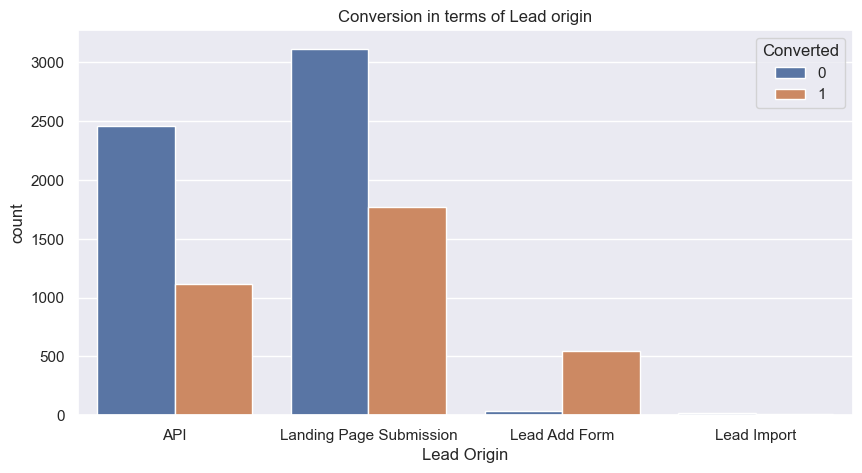

In [481]:
plt.figure(figsize = (10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = df0)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [482]:
# fedining a function for the lead orgon column and creating a pivot table.
def conversion_summary(df,col):
    convert = df.pivot_table(values = 'Lead Number', index = col, columns = 'Converted', aggfunc = 'count').fillna(0)
    convert['Conversion %'] = round(convert[1]/(convert[0] + convert[1]), 2)*100
    print(convert.sort_values(ascending = False, by = 'Conversion %'))

In [483]:
conversion_summary(df0, 'Lead Origin')

Converted                   0     1  Conversion %
Lead Origin                                      
Lead Add Form              37   544          94.0
Landing Page Submission  3118  1767          36.0
API                      2463  1115          31.0
Lead Import                21     9          30.0


### Insights
 - Though less leads from Lead Add Form, it has the highest conversion rates
 - Lead Add Form & Landing Page Submission though has avg of 33% conversion, it generates the most no. of leads.
 - Lead Import has the least amount of conversions and leads count.
 - To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission. Also, generate more leads from Lead Add form since they have a very good conversion rate

### Lead Source

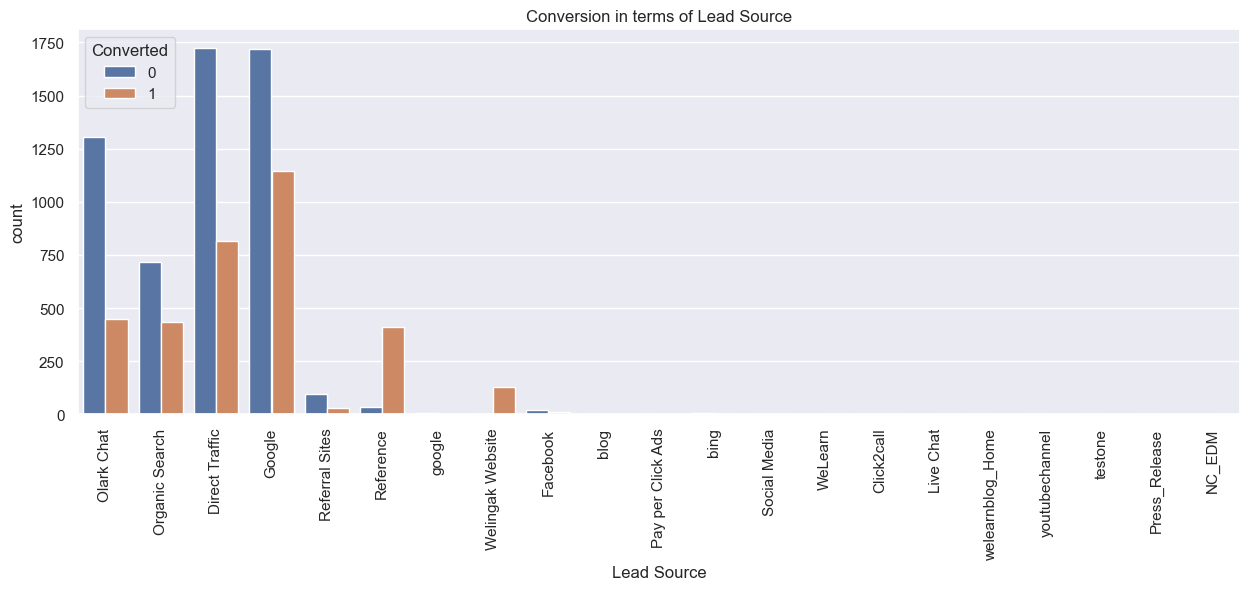

In [484]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df0)
plt.title('Conversion in terms of Lead Source')
plt.xticks(rotation = 90)
plt.show()

In [485]:
conversion_summary(df0, 'Lead Source')

Converted               0       1  Conversion %
Lead Source                                    
NC_EDM                0.0     1.0         100.0
WeLearn               0.0     1.0         100.0
Live Chat             0.0     2.0         100.0
Welingak Website      2.0   127.0          98.0
Reference            33.0   410.0          93.0
Click2call            1.0     3.0          75.0
Social Media          1.0     1.0          50.0
Google             1721.0  1147.0          40.0
Organic Search      718.0   436.0          38.0
Direct Traffic     1725.0   818.0          32.0
Facebook             22.0     9.0          29.0
Olark Chat         1305.0   448.0          26.0
Referral Sites       94.0    31.0          25.0
bing                  5.0     1.0          17.0
Pay per Click Ads     1.0     0.0           0.0
Press_Release         2.0     0.0           0.0
blog                  1.0     0.0           0.0
google                5.0     0.0           0.0
testone               1.0     0.0       

- As few lwads have very low count we can merge them together as Others.
- Merging Google and google together

In [486]:
df0['Lead Source'].replace('google', 'Google', inplace = True)

In [487]:
df0['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others', inplace = True)

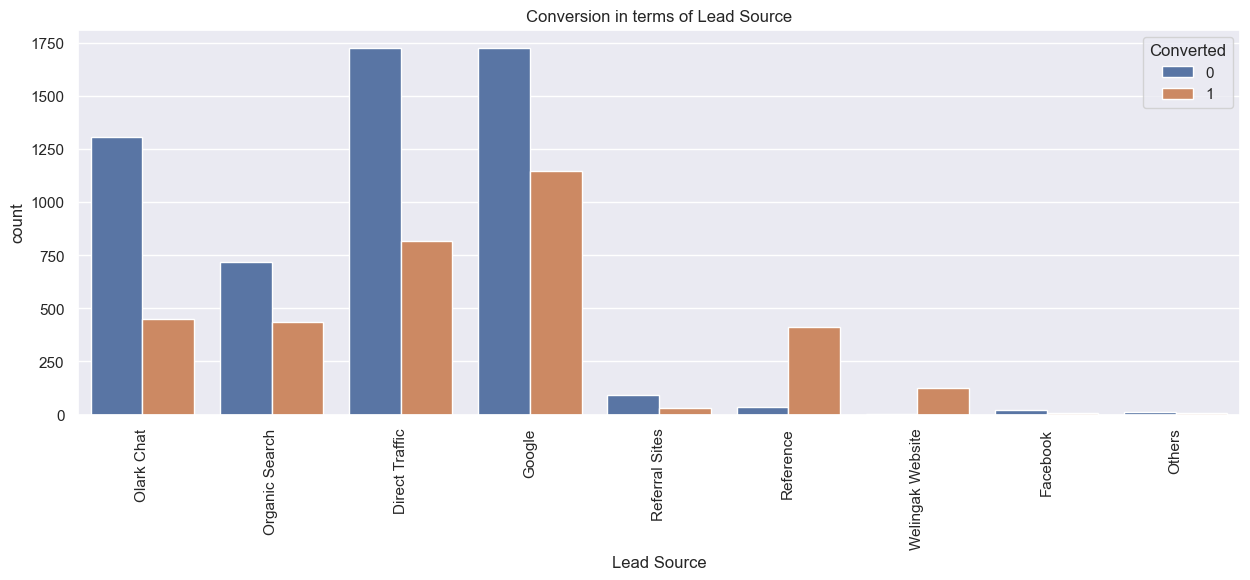

In [488]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'Lead Source', hue = 'Converted', data = df0)
plt.title('Conversion in terms of Lead Source')
plt.xticks(rotation = 90)
plt.show()

In [489]:
conversion_summary(df0,"Lead Source")

Converted            0     1  Conversion %
Lead Source                               
Welingak Website     2   127          98.0
Reference           33   410          93.0
Google            1726  1147          40.0
Others              14     9          39.0
Organic Search     718   436          38.0
Direct Traffic    1725   818          32.0
Facebook            22     9          29.0
Olark Chat        1305   448          26.0
Referral Sites      94    31          25.0


### Insights
- Google and direct traffic generates maximum number of leads but has conversion rate of 40% and 32% respectively.
- Welingak website and References has highest conversion rates around 98% and 93% but generates less number of leads.
- Olark chat and organic search has significant number of leads but their conversion rate is low, around 26% and 38%.
- To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source.
    Also, generate more leads from reference and welingak website since they have a very good conversion rate.

### Do Not Email & Do Not Call

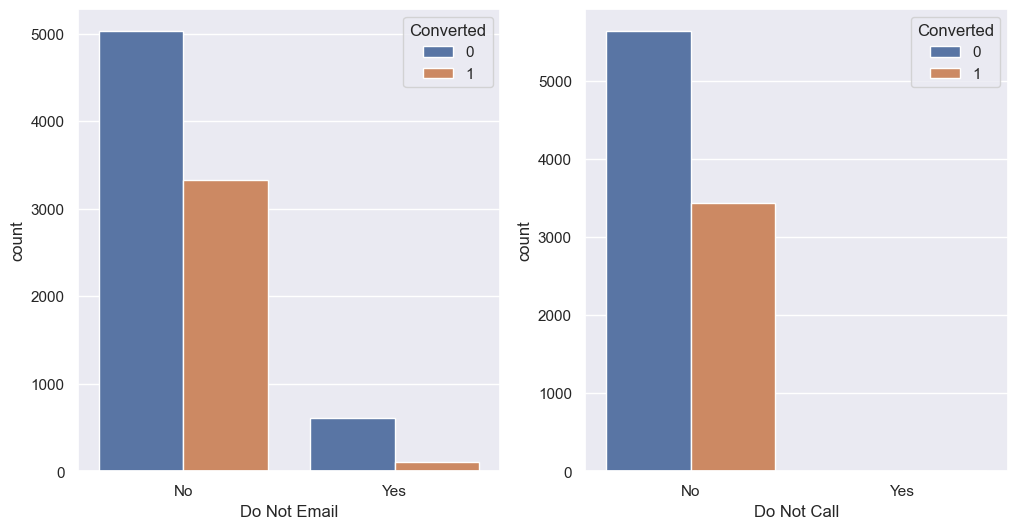

In [490]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = 'Do Not Email', hue = 'Converted', data = df0, ax = axs[0])
sns.countplot(x = 'Do Not Call', hue = 'Converted', data = df0, ax = axs[1])
plt.show()

In [491]:
conversion_summary(df0, 'Do Not Email')

Converted        0     1  Conversion %
Do Not Email                          
No            5027  3331          40.0
Yes            612   104          15.0


In [492]:
conversion_summary(df0, 'Do Not Call')

Converted         0       1  Conversion %
Do Not Call                              
Yes             0.0     2.0         100.0
No           5639.0  3433.0          38.0


### Insights
 - More than 95% of the leads do not prefer to be called or emailed.

### Total Visits

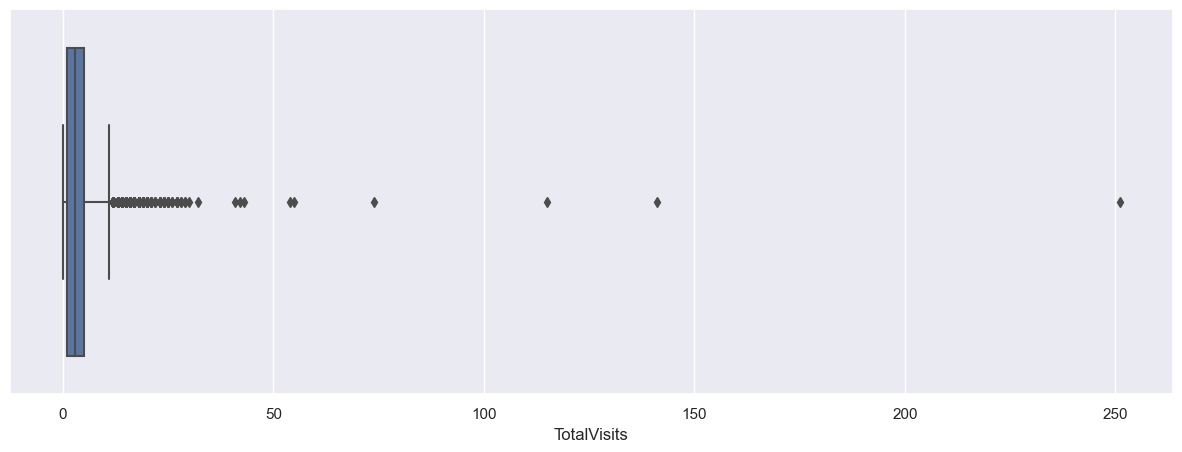

In [493]:
plt.figure(figsize = (15,5))
sns.boxplot(df0.TotalVisits)
plt.show()

In [494]:
# Since we see outliers, we will restrict the data to 95 percentile.
percentiles = df0['TotalVisits'].quantile([0.05,0.95]).values
df0['TotalVisits'][df0['TotalVisits'] <= percentiles[0]] = percentiles[0]
df0['TotalVisits'][df0['TotalVisits'] >= percentiles[1]] = percentiles[1]

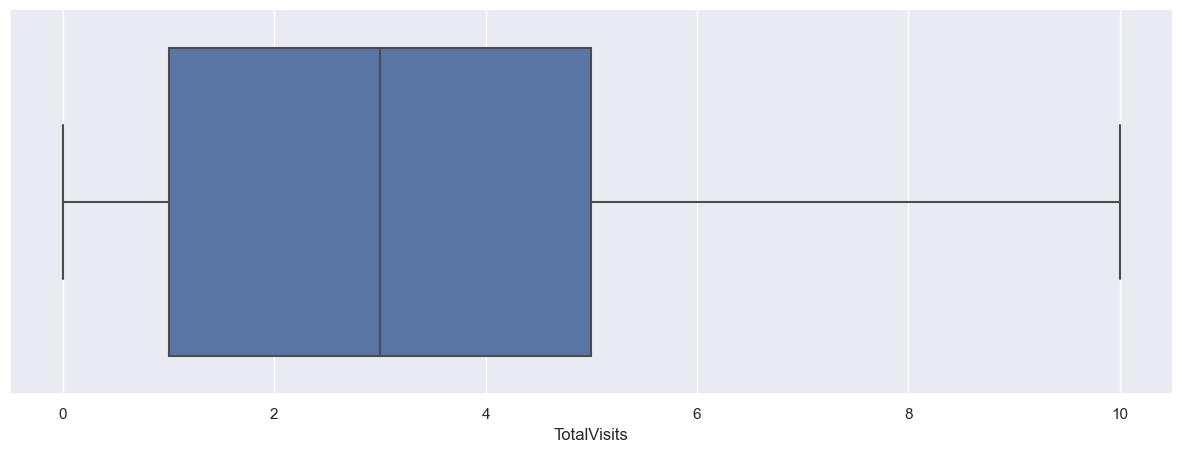

In [495]:
plt.figure(figsize = (15,5))
sns.boxplot(df0.TotalVisits)
plt.show()

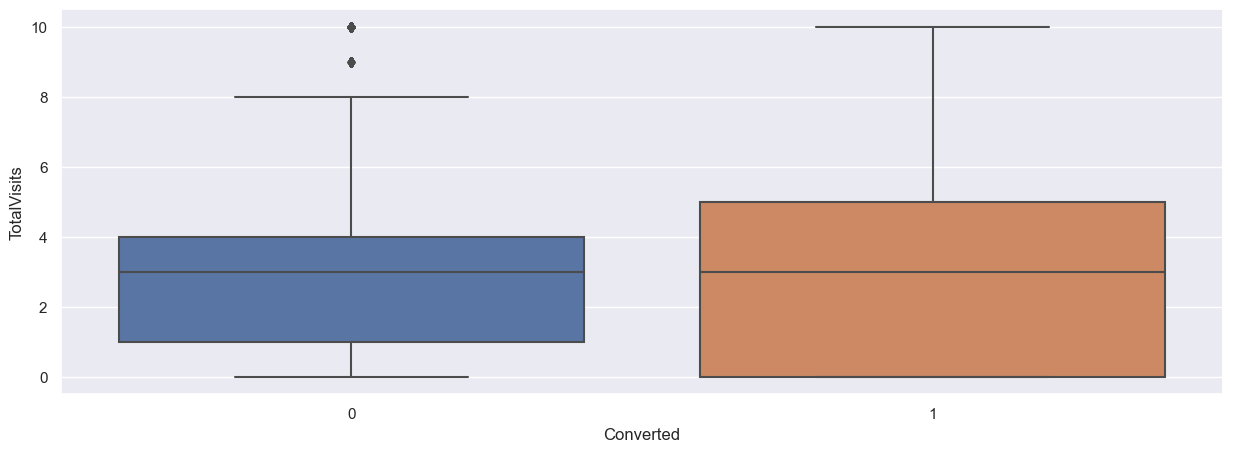

In [496]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df0)
plt.show()

### Insights
 - Median for both are same.
 - Increase in total visit has a slight higer chance to be converted.

### Total time spent on website

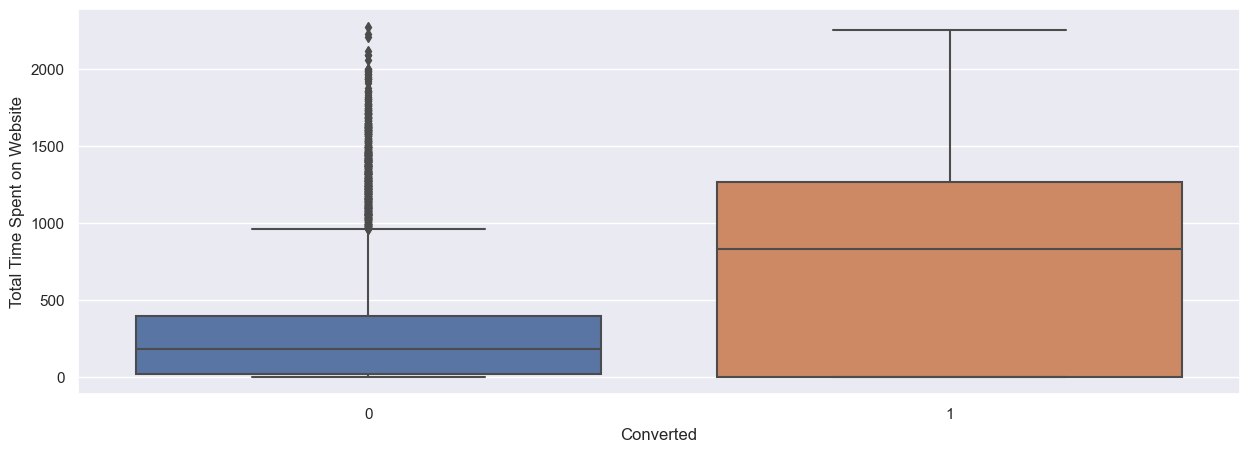

In [497]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df0)
plt.show()

### Insights
 - People spending more time on the website has a higher chance to be converted.

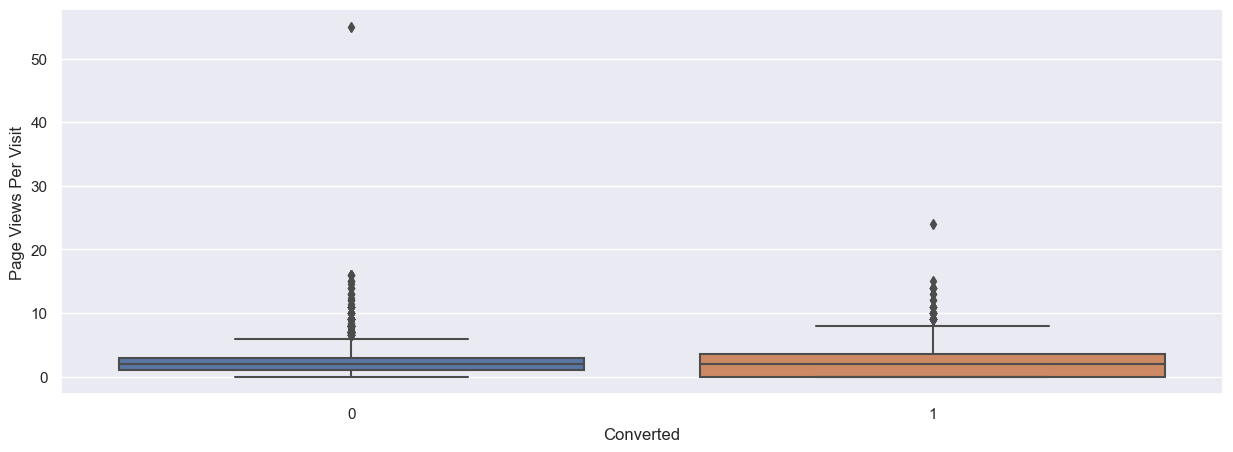

In [498]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df0)
plt.show()

In [499]:
# Restrict data from 0.05 to 0.95 percentile
percentiles = df0['Page Views Per Visit'].quantile([0.05,0.95]).values
df0['Page Views Per Visit'][df0['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df0['Page Views Per Visit'][df0['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

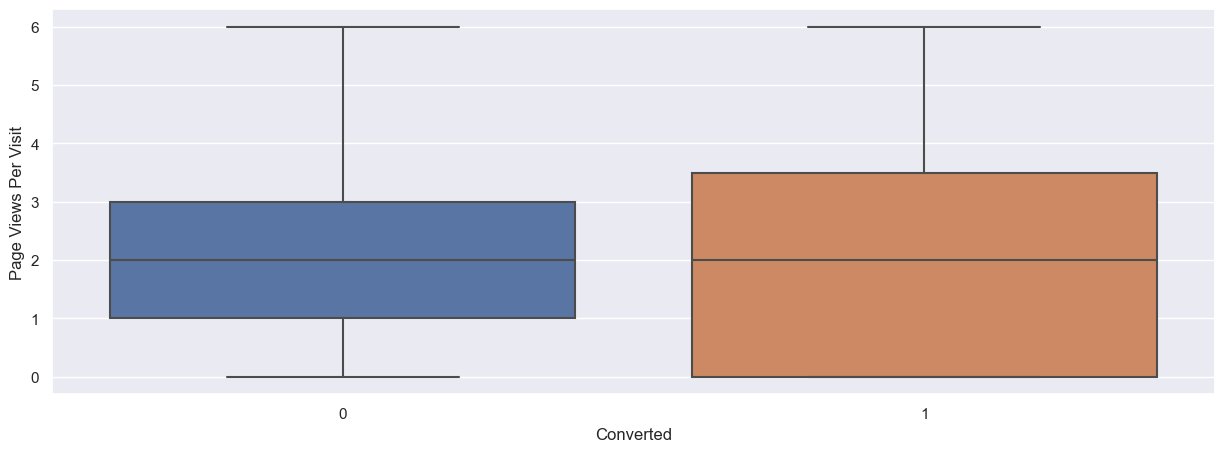

In [500]:
plt.figure(figsize = (15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df0)
plt.show()

### Insights
 - The median for both is the same.
 - People who visit 1 to 3 pages has an equal chance of being converted or not.
 - People who visit less than 1 page or higer than 3 pages has a slightly higer chance of being converted.

### Last Activity

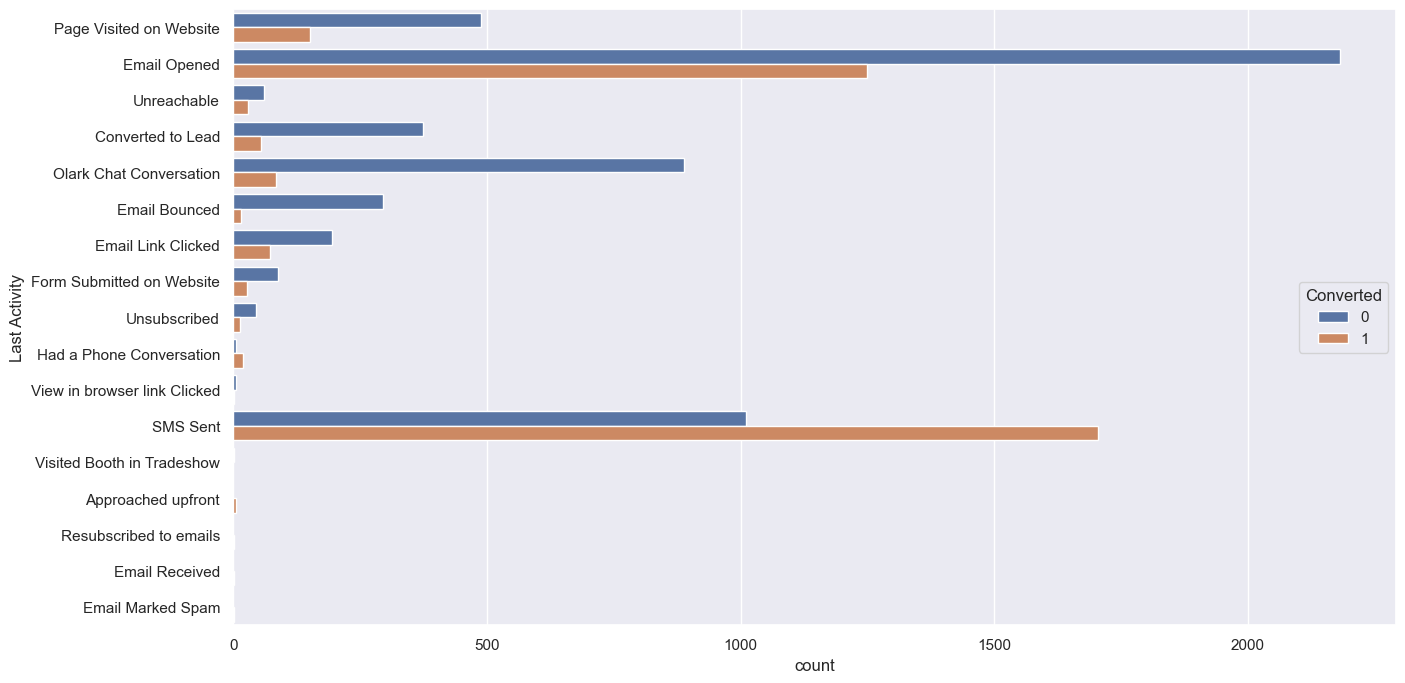

In [501]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'Last Activity', hue = 'Converted', data = df0)
plt.show()

In [502]:
conversion_summary(df0, 'Last Activity')

Converted                          0       1  Conversion %
Last Activity                                             
Approached upfront               0.0     5.0         100.0
Email Marked Spam                0.0     2.0         100.0
Resubscribed to emails           0.0     1.0         100.0
Email Received                   0.0     2.0         100.0
Had a Phone Conversation         5.0    20.0          80.0
SMS Sent                      1011.0  1705.0          63.0
Email Opened                  2182.0  1250.0          36.0
Unreachable                     61.0    29.0          32.0
Email Link Clicked             194.0    73.0          27.0
Form Submitted on Website       88.0    28.0          24.0
Page Visited on Website        489.0   151.0          24.0
Unsubscribed                    45.0    14.0          24.0
View in browser link Clicked     5.0     1.0          17.0
Converted to Lead              374.0    54.0          13.0
Olark Chat Conversation        888.0    84.0           9

### Insights
- Maximum leads are generated from people with last activity: Email opened and SMS sent, conversion rate is around 63% and 36%.
- To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity: olark chat conversation,SMS sent and Page Visited on Website.

### Specialization

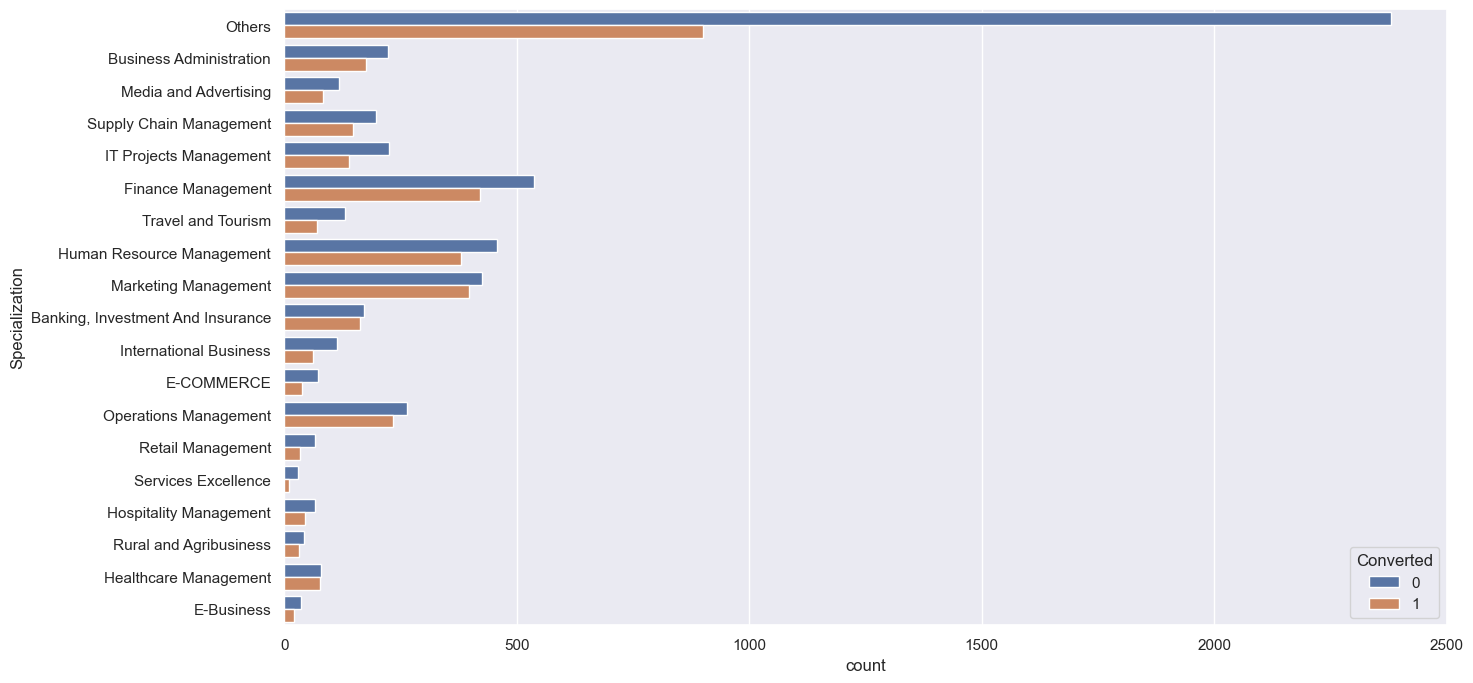

In [503]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'Specialization', hue = 'Converted', data = df0)
plt.show()

In [504]:
conversion_summary(df0, 'Specialization')

Converted                             0    1  Conversion %
Specialization                                            
Banking, Investment And Insurance   171  164          49.0
Healthcare Management                80   76          49.0
Marketing Management                426  397          48.0
Operations Management               265  234          47.0
Human Resource Management           457  380          45.0
Finance Management                  537  422          44.0
Business Administration             224  175          44.0
Supply Chain Management             198  148          43.0
Rural and Agribusiness               42   31          42.0
Media and Advertising               118   84          42.0
Hospitality Management               66   45          41.0
IT Projects Management              226  140          38.0
E-Business                           36   21          37.0
International Business              114   62          35.0
E-COMMERCE                           72   39          35

### Insights
- Most of the Specialization has a more than 40 % conversion rate, with Finance Management and Human Resource Management having hioger leads and conversion rates.

### Occupation

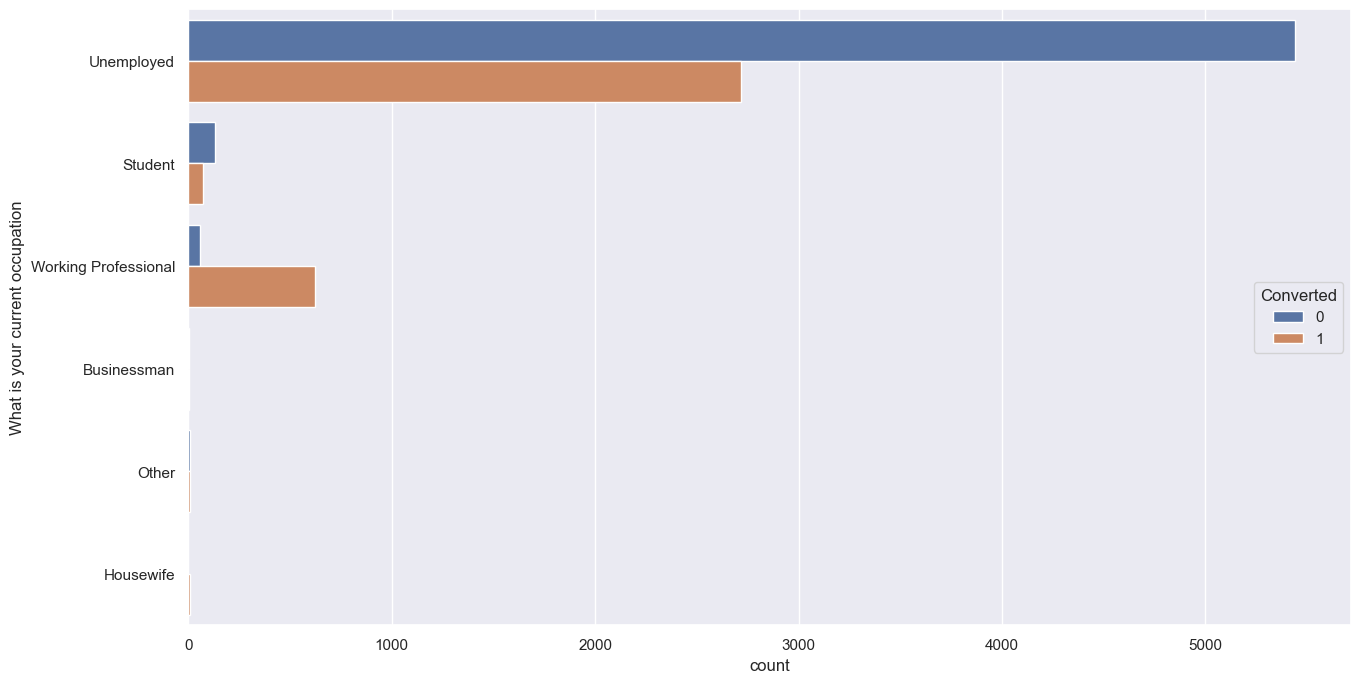

In [505]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'What is your current occupation', hue = 'Converted', data = df0)
plt.show()

In [506]:
conversion_summary(df0, 'What is your current occupation')

Converted                             0       1  Conversion %
What is your current occupation                              
Housewife                           0.0     9.0         100.0
Working Professional               55.0   622.0          92.0
Businessman                         3.0     5.0          62.0
Other                               6.0     9.0          60.0
Student                           132.0    74.0          36.0
Unemployed                       5443.0  2716.0          33.0


### Insights
- Working Professionals and Unemployed people generates maximum leads with converstion rates of 92% and 33%.
- To improve overall lead conversion rate, focus should be on improving lead conversion of unemployed. Also, generate more leads from Working Professionals and Housewives.

### City

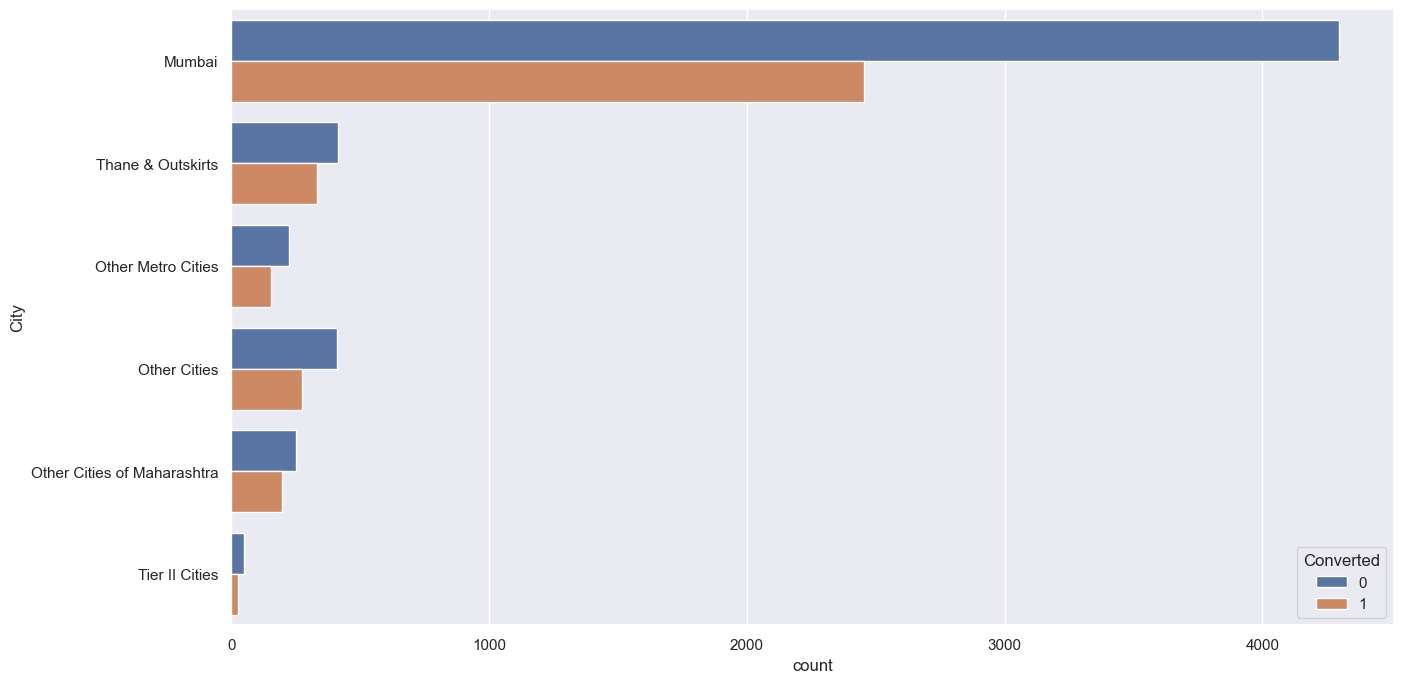

In [507]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'City', hue = 'Converted', data = df0)
plt.show()

### Insights
 -  Since maxium leads are from Mumbai City, focus should be on converting them more.

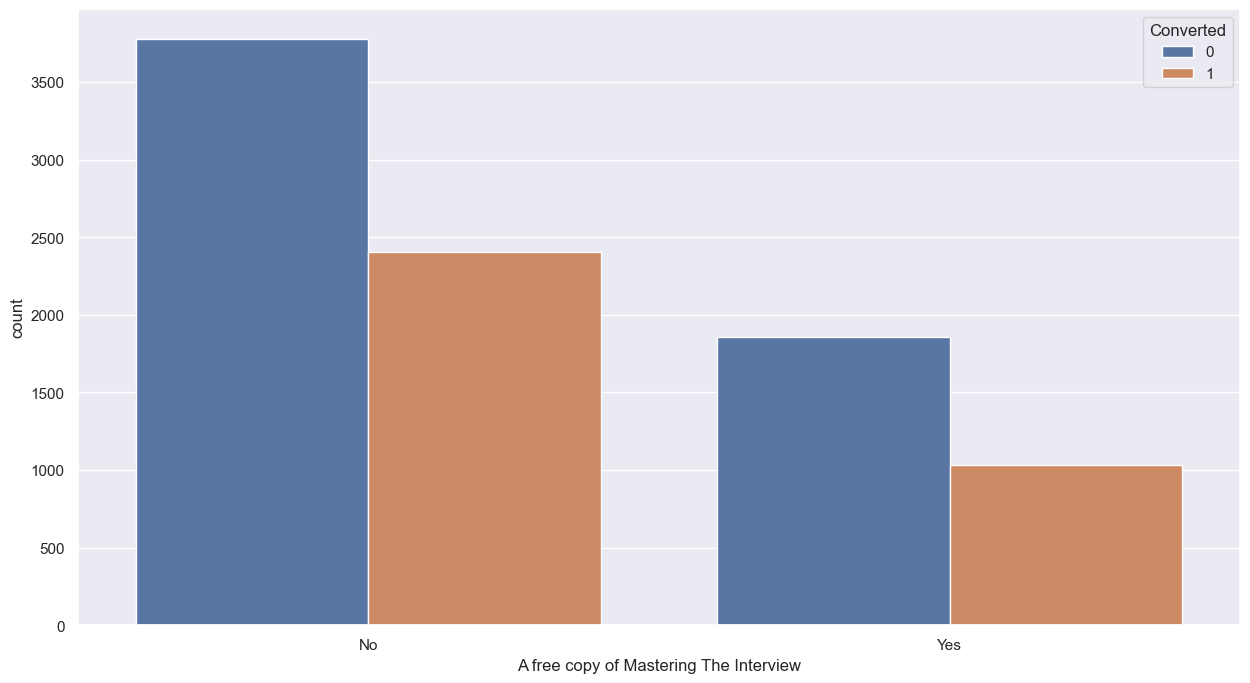

In [508]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data = df0)
plt.show()

In [509]:
conversion_summary(df0, 'A free copy of Mastering The Interview')

Converted                                  0     1  Conversion %
A free copy of Mastering The Interview                          
No                                      3781  2405          39.0
Yes                                     1858  1030          36.0


### Insights
- Most of the lead otped out ofthe free copy and those opted for it their conversion rate is lower than those opted in.

### Last Notable Activity


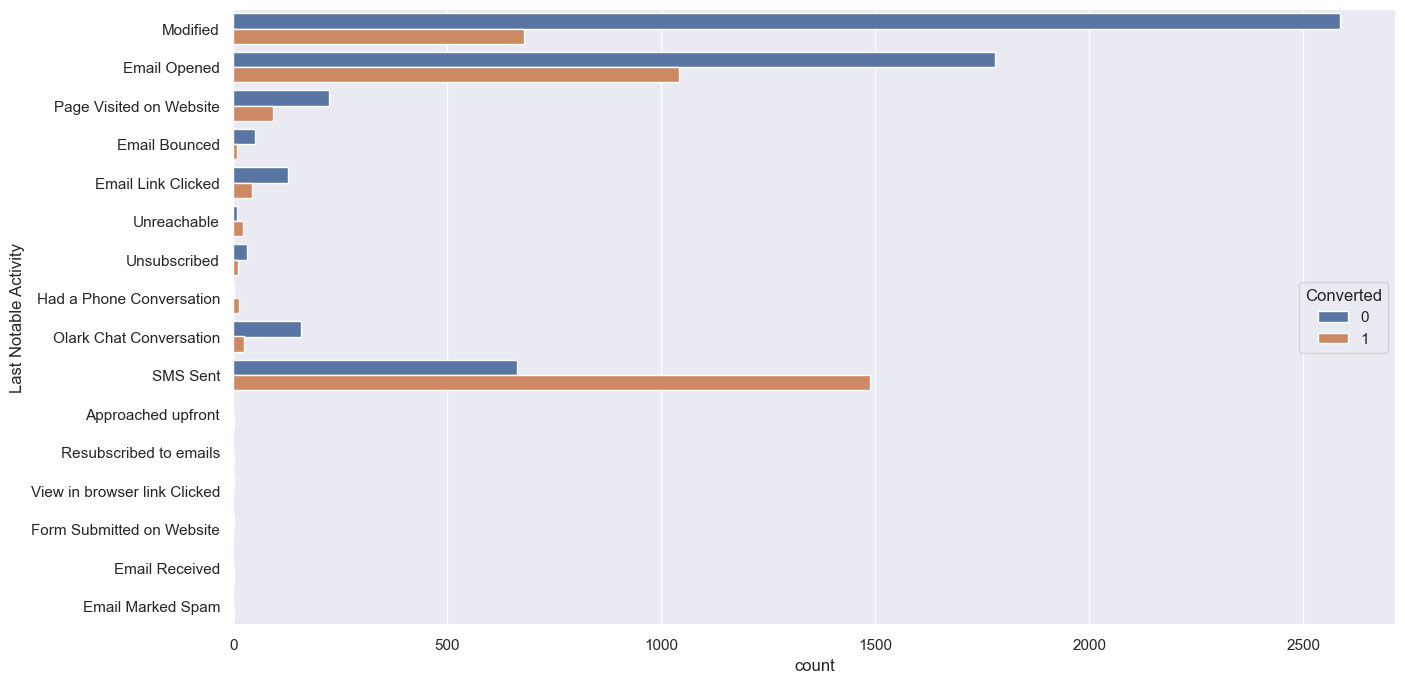

In [510]:
plt.figure(figsize = (15,8))
sns.countplot(y = 'Last Notable Activity', hue = 'Converted', data = df0)
plt.show()

In [511]:
conversion_summary(df0, 'Last Notable Activity')

Converted                          0       1  Conversion %
Last Notable Activity                                     
Approached upfront               0.0     1.0         100.0
Email Marked Spam                0.0     2.0         100.0
Email Received                   0.0     1.0         100.0
Resubscribed to emails           0.0     1.0         100.0
Had a Phone Conversation         1.0    13.0          93.0
SMS Sent                       663.0  1489.0          69.0
Unreachable                     10.0    22.0          69.0
Email Opened                  1781.0  1042.0          37.0
Page Visited on Website        225.0    93.0          29.0
Unsubscribed                    33.0    12.0          27.0
Email Link Clicked             128.0    45.0          26.0
Modified                      2587.0   680.0          21.0
Email Bounced                   51.0     9.0          15.0
Olark Chat Conversation        158.0    25.0          14.0
Form Submitted on Website        1.0     0.0           0

### Insights
- SMS sent has a very high conversion rate.

### Search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement ,Through Recommendations

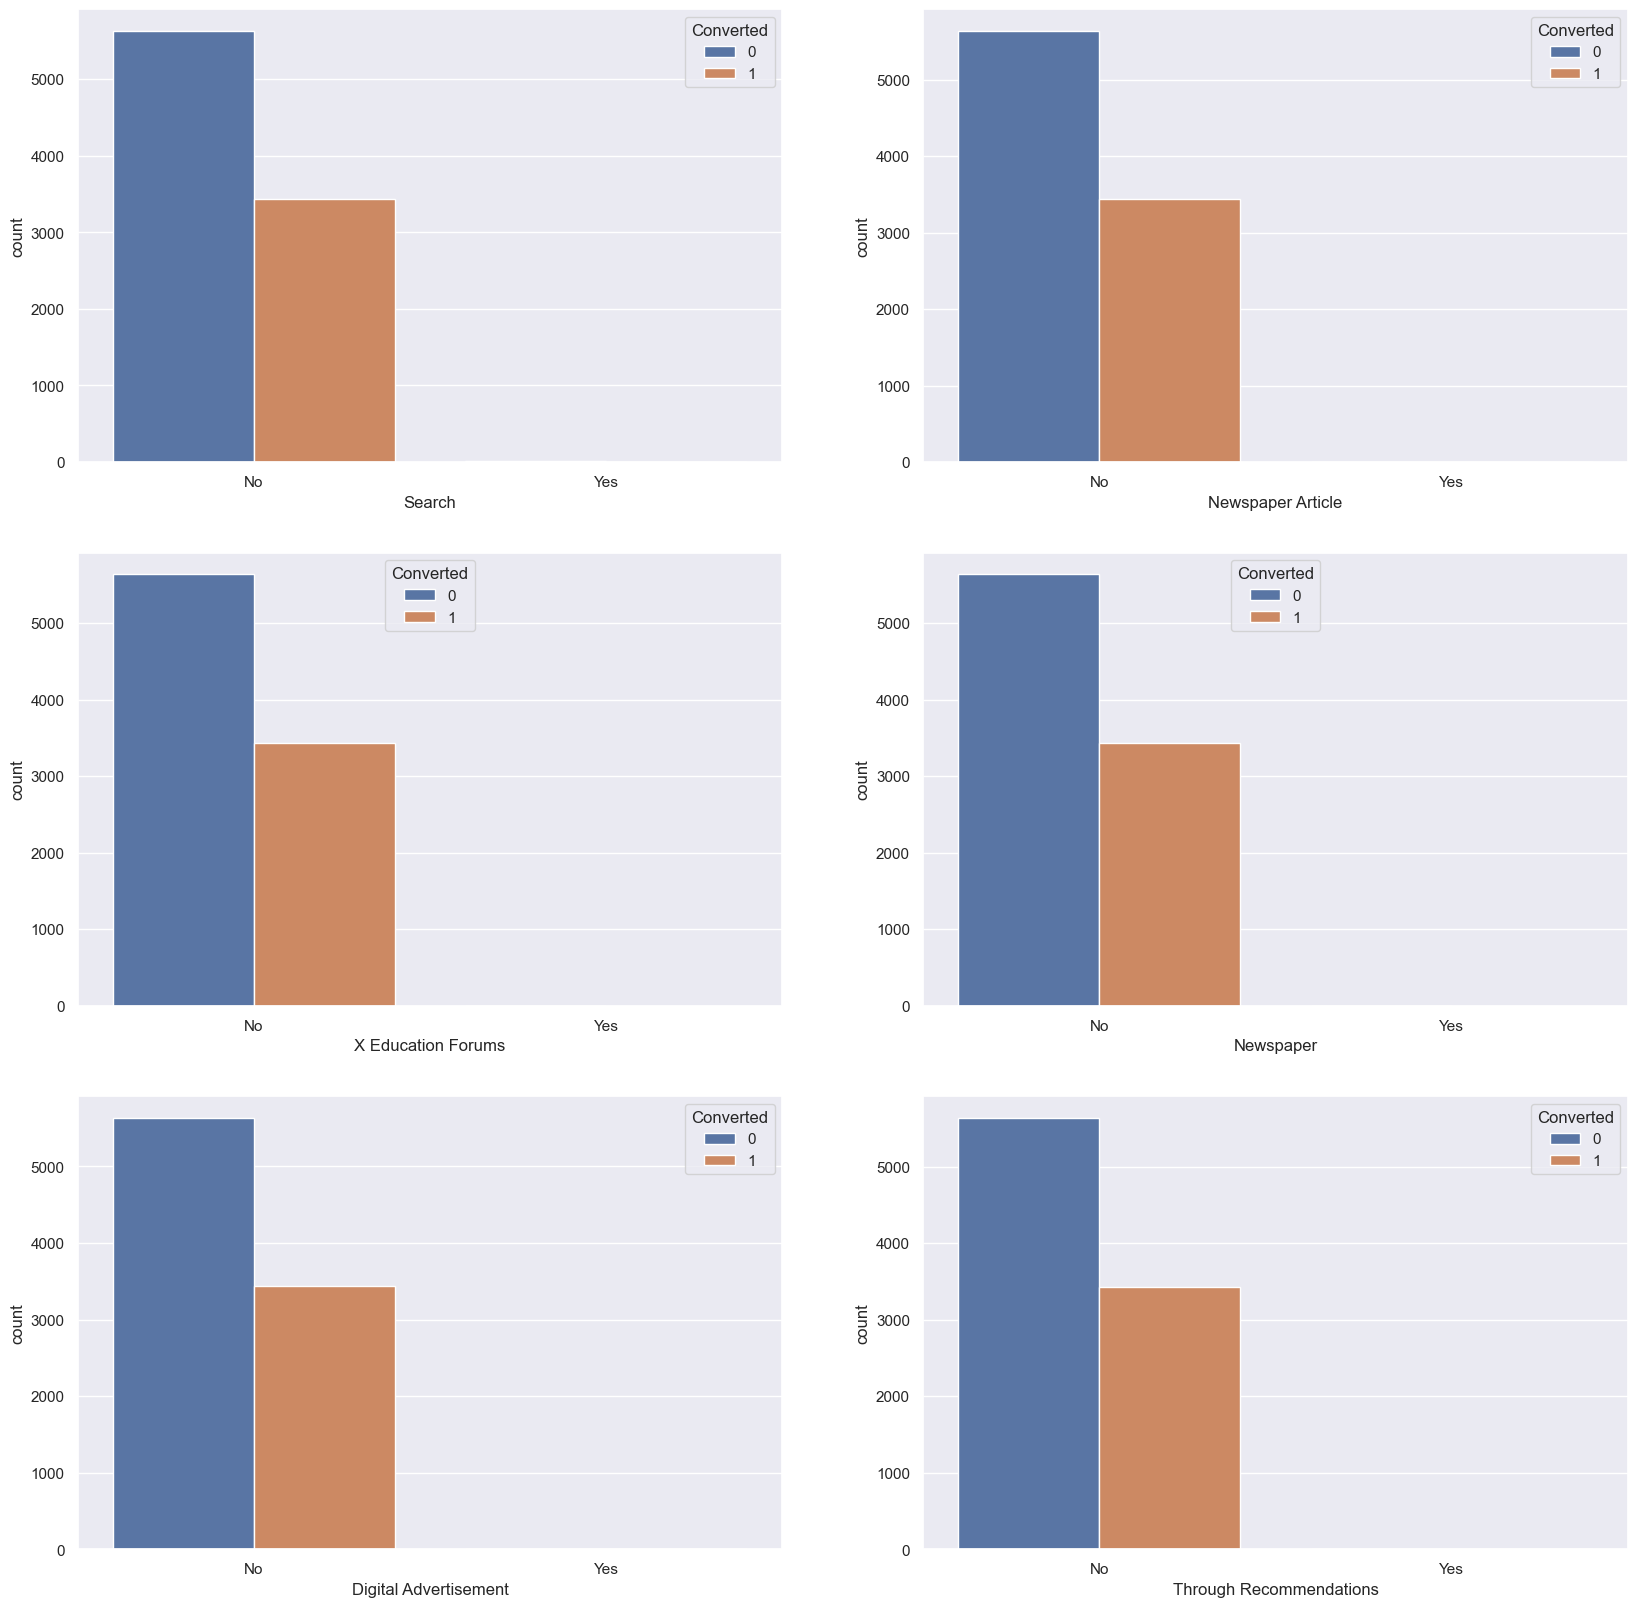

In [512]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'Search', hue = 'Converted', data = df0)

plt.subplot(3,2,2)
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data = df0)

plt.subplot(3,2,3)
sns.countplot(x = 'X Education Forums', hue = 'Converted', data = df0)

plt.subplot(3,2,4)
sns.countplot(x = 'Newspaper', hue = 'Converted', data = df0)

plt.subplot(3,2,5)
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data = df0)

plt.subplot(3,2,6)
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data = df0)

plt.show()

### Insights
- Almost no one saw the advertisement through the above platforms.

In [513]:
cor = df0.drop('Lead Number', axis = 1).corr()
cor

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.050742,0.359261,0.000329
TotalVisits,0.050742,1.000000,0.361207,0.766567
Total Time Spent on Website,0.359261,0.361207,1.000000,0.364735
Page Views Per Visit,0.000329,0.766567,0.364735,1.000000


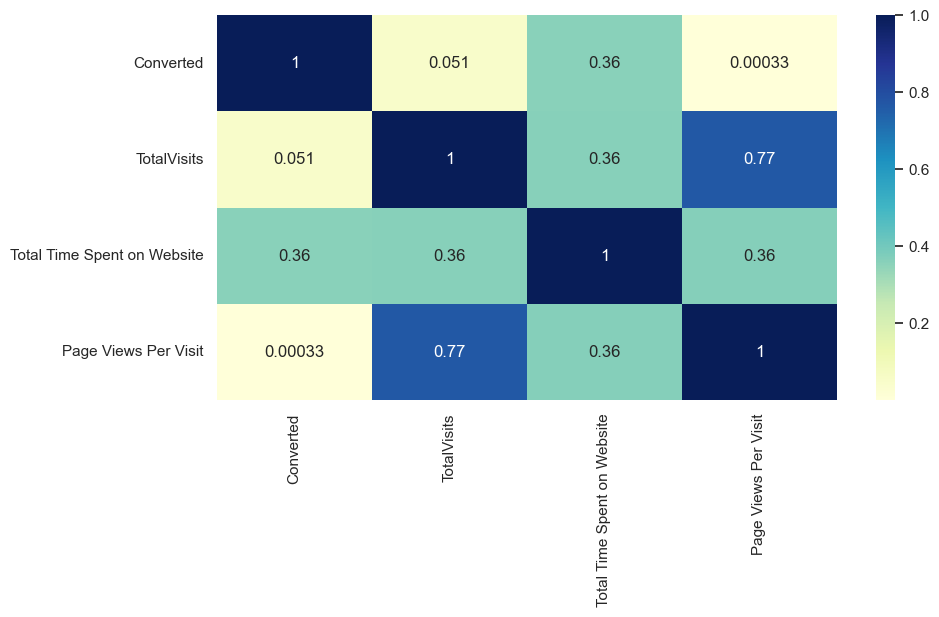

In [514]:
plt.figure(figsize = (10,5))
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

### We can see the TotalVisits and Page Views Per Visit has hi co-lonearity, hence either of the two has to be there.

# 4. Data Preparation

### Through our insights, we can drop few column which will not help in the model.

In [515]:
df1 = df0.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [516]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,No,Modified


In [517]:
df1.shape

(9074, 14)

### Converting bibary variable to 0s and 1s.

In [518]:
cl =  ['A free copy of Mastering The Interview', 'Do Not Email', 'Do Not Call']

# Defining the map function
def bmap(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the map function to the binary variables list
df1[cl] = df1[cl].apply(bmap)

In [519]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified


### Creating Dummy variables for categorical columns

In [520]:
dummy = pd.get_dummies(df1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']], 
                       drop_first=True)
df2 = pd.concat([df1, dummy], axis=1)

In [521]:
df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [522]:
# Dropping column for which dummies are created
df2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'], 1, inplace = True)

In [523]:
df2.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 5. Splitting the data

In [524]:
# Putting feature variable to X
X = df2.drop(['Converted'], axis=1)

# Putting response variable to y
y = df2['Converted']

In [525]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# 6. Scaling the cloumns

In [526]:
#create object of StandardScaler
scaler = MinMaxScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,0.2,0.178347,0.333333,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,0.2,0.085355,0.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.0,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,0.2,0.619946,0.333333,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.5,0.711590,0.416667,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Since there are too many columns, we will use RFE for feature selection

# 7. Feature selection using RFE

In [527]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select = 20) 
rfe = rfe.fit(X_train, y_train)

In [528]:
# Columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

# 9. Building the model

In [529]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.5
Date:                Tue, 15 Aug 2023   Deviance:                       5137.0
Time:                        13:52:32   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3995      0.171      2.333      0.020       0.064       0.735
Do Not Email                                            -1.5701      0.202     -7.762      0.000      -1.967      -1.174
TotalVisits                                              0.9907      0.198      5.002      0.000       0.602       1.379
Total Time Spent on Website                              4.4805      0.166     26.911      0.000       4.154       4.807
Page Views Per Visit                                    -1.0195      0.205     -4.975      0.000      -1.421      -0.618
Lead Origin_Landing Page Submission                     -1.0798      0.129     -8.373      0.000      -1.333      -0.827
Lead Origin_Lead Add Form                                3.1977      0.249     12.835      0.000       2.709       3.686
Lead Source_Olark Chat                                   1.0084      0.143      7.068      0.000       0.729       1.288
Lead Source_Welingak Website                             2.6666      0.759      3.514      0.000       1.179       4.154
Last Activity_Converted to Lead                         -1.0458      0.232     -4.513      0.000      -1.500      -0.592
Last Activity_Email Bounced                             -1.3064      0.437     -2.988      0.003      -2.163      -0.449
Last Activity_Had a Phone Conversation                   1.8025      0.796      2.264      0.024       0.242       3.363
Last Activity_Olark Chat Conversation                   -1.3574      0.196     -6.927      0.000      -1.741      -0.973
Specialization_Others                                   -1.1145      0.127     -8.766      0.000      -1.364      -0.865
What is your current occupation_Housewife               22.6614   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Working Professional     2.6435      0.196     13.501      0.000       2.260       3.027
Last Notable Activity_Email Link Clicked                -1.9606      0.259     -7.557      0.000      -2.469      -1.452
Last Notable Activity_Email Opened                      -1.4753      0.089    -16.518      0.000      -1.650      -1.300
Last Notable Activity_Modified                          -1.7707      0.101    -17.471      0.000      -1.969      -1.572
Last Notable Activity_Olark Chat Conversation           -1.5618      0.382     -4.085      0.000      -2.311      -0.812
Last Notable Activity_Page Visited on Website           -2.0328      0.213     -9.526      0.000      -2.451      -1.615
========================================================================================================================
"""

In [530]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,7.84
1,TotalVisits,6.31
4,Lead Origin_Landing Page Submission,4.34
12,Specialization_Others,2.91
17,Last Notable Activity_Modified,2.81
6,Lead Source_Olark Chat,2.22
2,Total Time Spent on Website,2.12
11,Last Activity_Olark Chat Conversation,2.03
16,Last Notable Activity_Email Opened,1.99
0,Do Not Email,1.86


### The p value for column 'What is your current occupation_Housewife' is very high and above the threshold hence dropping from the model 

In [531]:
col2 = cols.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [532]:
# Building model 2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.7
Date:                Tue, 15 Aug 2023   Deviance:                       5145.3
Time:                        13:52:32   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4075      0.171      2.381      0.017       0.072       0.743
Do Not Email                                            -1.5711      0.202     -7.766      0.000      -1.968      -1.175
TotalVisits                                              0.9858      0.198      4.981      0.000       0.598       1.374
Total Time Spent on Website                              4.4784      0.166     26.927      0.000       4.152       4.804
Page Views Per Visit                                    -1.0272      0.205     -5.016      0.000      -1.429      -0.626
Lead Origin_Landing Page Submission                     -1.0793      0.129     -8.376      0.000      -1.332      -0.827
Lead Origin_Lead Add Form                                3.2080      0.249     12.891      0.000       2.720       3.696
Lead Source_Olark Chat                                   1.0023      0.143      7.030      0.000       0.723       1.282
Lead Source_Welingak Website                             2.6516      0.759      3.494      0.000       1.164       4.139
Last Activity_Converted to Lead                         -1.0483      0.232     -4.525      0.000      -1.502      -0.594
Last Activity_Email Bounced                             -1.3060      0.437     -2.987      0.003      -2.163      -0.449
Last Activity_Had a Phone Conversation                   1.8032      0.796      2.264      0.024       0.242       3.364
Last Activity_Olark Chat Conversation                   -1.3552      0.196     -6.915      0.000      -1.739      -0.971
Specialization_Others                                   -1.1201      0.127     -8.815      0.000      -1.369      -0.871
What is your current occupation_Working Professional     2.6389      0.196     13.476      0.000       2.255       3.023
Last Notable Activity_Email Link Clicked                -1.9506      0.258     -7.557      0.000      -2.457      -1.445
Last Notable Activity_Email Opened                      -1.4684      0.089    -16.456      0.000      -1.643      -1.293
Last Notable Activity_Modified                          -1.7703      0.101    -17.468      0.000      -1.969      -1.572
Last Notable Activity_Olark Chat Conversation           -1.5606      0.382     -4.082      0.000      -2.310      -0.811
Last Notable Activity_Page Visited on Website           -2.0318      0.213     -9.522      0.000      -2.450      -1.614
========================================================================================================================
"""

In [533]:
# check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,7.84
1,TotalVisits,6.31
4,Lead Origin_Landing Page Submission,4.34
12,Specialization_Others,2.91
16,Last Notable Activity_Modified,2.81
6,Lead Source_Olark Chat,2.22
2,Total Time Spent on Website,2.11
11,Last Activity_Olark Chat Conversation,2.03
15,Last Notable Activity_Email Opened,1.99
0,Do Not Email,1.86


### Now, all the p-values are below threshold i.e 0.05, but VIF is high, so dropping Page Views Per Visit.

In [534]:
col3 = col2.drop(['Page Views Per Visit'], 1)
col3

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [535]:
# Building model 3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2585.4
Date:                Tue, 15 Aug 2023   Deviance:                       5170.8
Time:                        13:52:33   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4048
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1321      0.162      0.816      0.414      -0.185       0.449
Do Not Email                                            -1.5905      0.201     -7.911      0.000      -1.985      -1.196
TotalVisits                                              0.4337      0.165      2.635      0.008       0.111       0.756
Total Time Spent on Website                              4.4672      0.166     26.912      0.000       4.142       4.793
Lead Origin_Landing Page Submission                     -1.1351      0.128     -8.864      0.000      -1.386      -0.884
Lead Origin_Lead Add Form                                3.4455      0.245     14.082      0.000       2.966       3.925
Lead Source_Olark Chat                                   1.2218      0.136      8.973      0.000       0.955       1.489
Lead Source_Welingak Website                             2.6353      0.759      3.472      0.001       1.148       4.123
Last Activity_Converted to Lead                         -0.9602      0.231     -4.151      0.000      -1.414      -0.507
Last Activity_Email Bounced                             -1.2175      0.435     -2.797      0.005      -2.071      -0.364
Last Activity_Had a Phone Conversation                   1.7868      0.797      2.241      0.025       0.224       3.350
Last Activity_Olark Chat Conversation                   -1.3405      0.196     -6.849      0.000      -1.724      -0.957
Specialization_Others                                   -1.0911      0.127     -8.621      0.000      -1.339      -0.843
What is your current occupation_Working Professional     2.6262      0.196     13.416      0.000       2.243       3.010
Last Notable Activity_Email Link Clicked                -1.8954      0.255     -7.427      0.000      -2.396      -1.395
Last Notable Activity_Email Opened                      -1.4393      0.089    -16.228      0.000      -1.613      -1.265
Last Notable Activity_Modified                          -1.7508      0.101    -17.354      0.000      -1.949      -1.553
Last Notable Activity_Olark Chat Conversation           -1.5081      0.381     -3.960      0.000      -2.255      -0.762
Last Notable Activity_Page Visited on Website           -1.8319      0.208     -8.801      0.000      -2.240      -1.424
========================================================================================================================
"""

In [536]:
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Landing Page Submission,3.67
1,TotalVisits,3.51
15,Last Notable Activity_Modified,2.79
11,Specialization_Others,2.79
5,Lead Source_Olark Chat,2.14
2,Total Time Spent on Website,2.09
10,Last Activity_Olark Chat Conversation,2.03
14,Last Notable Activity_Email Opened,1.98
0,Do Not Email,1.85
8,Last Activity_Email Bounced,1.78


### P-values are low, but keeping the threshold of the VIF to 3, and dropping Lead Origin_Landing Page Submission

In [537]:
col4 = col3.drop(['Lead Origin_Landing Page Submission'],1)
col4

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [538]:
# Building model 4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.8
Date:                Tue, 15 Aug 2023   Deviance:                       5251.5
Time:                        13:52:33   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3972
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9221      0.111     -8.330      0.000      -1.139      -0.705
Do Not Email                                            -1.6072      0.198     -8.124      0.000      -1.995      -1.219
TotalVisits                                              0.4541      0.164      2.775      0.006       0.133       0.775
Total Time Spent on Website                              4.5345      0.165     27.454      0.000       4.211       4.858
Lead Origin_Lead Add Form                                4.1219      0.232     17.755      0.000       3.667       4.577
Lead Source_Olark Chat                                   1.5689      0.131     12.003      0.000       1.313       1.825
Lead Source_Welingak Website                             2.2400      0.757      2.960      0.003       0.757       3.723
Last Activity_Converted to Lead                         -0.9895      0.231     -4.284      0.000      -1.442      -0.537
Last Activity_Email Bounced                             -1.2383      0.427     -2.900      0.004      -2.075      -0.401
Last Activity_Had a Phone Conversation                   1.8959      0.794      2.388      0.017       0.340       3.452
Last Activity_Olark Chat Conversation                   -1.2703      0.192     -6.628      0.000      -1.646      -0.895
Specialization_Others                                   -0.3054      0.089     -3.426      0.001      -0.480      -0.131
What is your current occupation_Working Professional     2.6967      0.191     14.127      0.000       2.323       3.071
Last Notable Activity_Email Link Clicked                -1.8857      0.254     -7.415      0.000      -2.384      -1.387
Last Notable Activity_Email Opened                      -1.4002      0.088    -15.928      0.000      -1.572      -1.228
Last Notable Activity_Modified                          -1.7182      0.100    -17.194      0.000      -1.914      -1.522
Last Notable Activity_Olark Chat Conversation           -1.5457      0.375     -4.126      0.000      -2.280      -0.811
Last Notable Activity_Page Visited on Website           -1.8059      0.207     -8.709      0.000      -2.212      -1.400
========================================================================================================================
"""

In [539]:
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.75
14,Last Notable Activity_Modified,2.50
10,Specialization_Others,2.21
4,Lead Source_Olark Chat,2.13
9,Last Activity_Olark Chat Conversation,2.03
2,Total Time Spent on Website,1.95
0,Do Not Email,1.82
7,Last Activity_Email Bounced,1.77
13,Last Notable Activity_Email Opened,1.75
3,Lead Origin_Lead Add Form,1.54


## Now both the P-values and VIF are well below the threshold, hence this can be our final model.

In [540]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

3009    0.194230
1012    0.289346
9226    0.201518
4750    0.878662
7987    0.692830
dtype: float64

## Creating a dataframe with actual converted and probability and conversion probability.

In [541]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred.values})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead ID
0,0,0.194230,3009
1,0,0.289346,1012
2,0,0.201518,9226
3,1,0.878662,4750
4,1,0.692830,7987


In [542]:
# Assigning 1 to a new column Predicted if the Probability is greater than 0.05
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead ID,predicted
0,0,0.194230,3009,0
1,0,0.289346,1012,0
2,0,0.201518,9226,0
3,1,0.878662,4750,1
4,1,0.692830,7987,1


# 10. Model Evaluation

In [543]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3450  455]
 [ 724 1722]]


In [544]:
# check the overall accuracy
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100

81.43599433160132

- Accuracy - 81%

In [545]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [546]:
#sensitivity 
TP / (TP + FN) *100

70.40065412919051

- sensitivity - 70%

In [547]:
#specificity
TN / (TN + FP)*100

88.348271446863

- Specificity - 88%

# 11. Finding the optimal cutoff of the probablity, usin ROC curve.

In [548]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

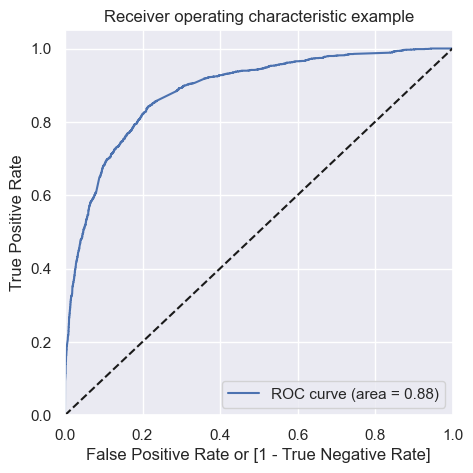

In [549]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

### The area under the curve should be a value closer to 1, since it is 0.88 our model is good.

In [550]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.194230,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.289346,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.201518,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.878662,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.692830,7987,1,1,1,1,1,1,1,1,0,0,0


In [551]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.598331     0.971791    0.364405
0.2          0.2  0.747284     0.917825    0.640461
0.3          0.3  0.805385     0.843827    0.781306
0.4          0.4  0.809794     0.773508    0.832522
0.5          0.5  0.814360     0.704007    0.883483
0.6          0.6  0.799087     0.599755    0.923944
0.7          0.7  0.781767     0.513900    0.949552
0.8          0.8  0.760668     0.428455    0.968758
0.9          0.9  0.712644     0.272281    0.988476


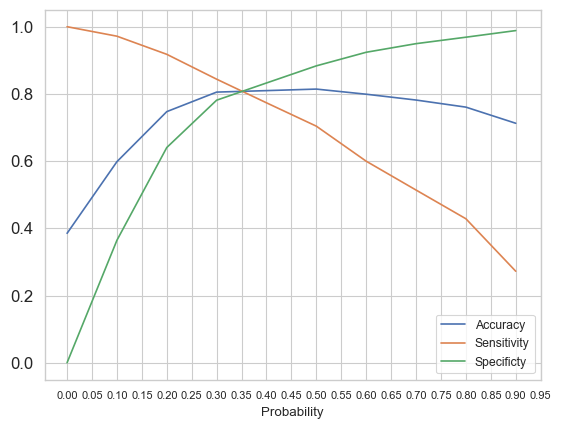

In [552]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

### From the above figure we can see that that the optimal cut-off is 0.35.

In [553]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.194230,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.289346,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.201518,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.878662,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.692830,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [554]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.194230,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.289346,1012,0,1,1,1,0,0,0,0,0,0,0,0,29
2,0,0.201518,9226,0,1,1,1,0,0,0,0,0,0,0,0,20
3,1,0.878662,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.692830,7987,1,1,1,1,1,1,1,1,0,0,0,1,69


In [555]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)*100

80.74319004881121

In [556]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3145,  760],
       [ 463, 1983]])

In [557]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [558]:
#sensitivity 
TP / (TP + FN) *100

81.07113654946852

In [559]:
#specificity
TN / (TN + FP)*100

80.53777208706786

## We see that at cut-off 0.35 all  3 values are balance at 80%.

# 13. Precision & Recall

In [560]:
#Calculating Precision
precision = TP/(TP+FP)*100
precision

72.29310973386804

In [561]:
#Calculating Recall
recall = TP/(TP+FN)*100
recall

81.07113654946852

### Insights
- As per our business objective, the recall percentage is more significant at 81%, since we don't want to left out any hot leads which are willing to get converted. Therefore, our model is good.


# 14. Making predictions on test

In [562]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [563]:
X_test = X_test[col4]

X_test.shape

(2723, 17)

In [564]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0.4,0.070530,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,0.5,0.679695,0,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,0.2,0.033243,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,0.8,0.073675,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [565]:
#add constant
X_test_sm = sm.add_constant(X_test)

#making predictions on test set
y_test_pred = res.predict(X_test_sm)

y_test_pred.head()

3271    0.106572
1490    0.975481
7936    0.084236
4216    0.814812
3830    0.164524
dtype: float64

In [566]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.106572
1490,0.975481
7936,0.084236
4216,0.814812
3830,0.164524


In [567]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [568]:
# Putting prospect ID to index
y_test_df['Lead ID'] = y_test_df.index

In [569]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [572]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis = 1)
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.106572
1,1,1490,0.975481
2,0,7936,0.084236
3,1,4216,0.814812
4,0,3830,0.164524


In [573]:
y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'}, inplace = True)

In [574]:
y_pred_final.head()

,Converted,Lead ID,Lead_Score_Prob
0,0,3271,0.106572
1,1,1490,0.975481
2,0,7936,0.084236
3,1,4216,0.814812
4,0,3830,0.164524


In [575]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead ID','Converted','Lead_Score_Prob'], axis=1)

In [576]:
# Adding Lead_Score column
y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0).astype(int)

In [577]:
y_pred_final.head()

,Lead ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.106572,11
1,1490,1,0.975481,98
2,7936,0,0.084236,8
3,4216,1,0.814812,81
4,3830,0,0.164524,16


In [578]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Lead ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.106572,11,0
1,1490,1,0.975481,98,1
2,7936,0,0.084236,8,0
3,4216,1,0.814812,81,1
4,3830,0,0.164524,16,0


In [580]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by = 'Lead_Score', ascending = False)

,Lead ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
23,5822,1,0.997258,100,1,Hot Lead
2053,8088,1,0.997258,100,1,Hot Lead
619,6784,1,0.996621,100,1,Hot Lead
1882,6290,1,0.996603,100,1,Hot Lead
2185,8090,1,0.997258,100,1,Hot Lead
25,2684,1,0.997258,100,1,Hot Lead
1137,5815,1,0.995743,100,1,Hot Lead
280,5797,1,0.997258,100,1,Hot Lead
1786,2011,1,0.998114,100,1,Hot Lead
2510,2673,1,0.997258,100,1,Hot Lead


In [581]:
# Accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)*100

80.3892765332354

In [582]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1397,  337],
       [ 197,  792]])

In [583]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [584]:
# sensitivity
TP / (TP+FN)*100

80.0808897876643

In [585]:
# Specificity
TN / float(TN+FP)

0.8056516724336793

# 15. Feature Importance

In [586]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.61
TotalVisits                                             0.45
Total Time Spent on Website                             4.53
Lead Origin_Lead Add Form                               4.12
Lead Source_Olark Chat                                  1.57
Lead Source_Welingak Website                            2.24
Last Activity_Converted to Lead                        -0.99
Last Activity_Email Bounced                            -1.24
Last Activity_Had a Phone Conversation                  1.90
Last Activity_Olark Chat Conversation                  -1.27
Specialization_Others                                  -0.31
What is your current occupation_Working Professional    2.70
Last Notable Activity_Email Link Clicked               -1.89
Last Notable Activity_Email Opened                     -1.40
Last Notable Activity_Modified                         -1.72
Last Notable Activity_Olark Chat Conversation          -1.55
Last Notable Activity_Pa

In [587]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -35.44
TotalVisits                                             10.01
Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               90.90
Lead Source_Olark Chat                                  34.60
Lead Source_Welingak Website                            49.40
Last Activity_Converted to Lead                        -21.82
Last Activity_Email Bounced                            -27.31
Last Activity_Had a Phone Conversation                  41.81
Last Activity_Olark Chat Conversation                  -28.01
Specialization_Others                                   -6.74
What is your current occupation_Working Professional    59.47
Last Notable Activity_Email Link Clicked               -41.59
Last Notable Activity_Email Opened                     -30.88
Last Notable Activity_Modified                         -37.89
Last Notable Activity_Olark Chat Conversation          -34.09
Last Not

In [588]:
##Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            12
TotalVisits                                             16
Total Time Spent on Website                             14
Lead Origin_Lead Add Form                                0
Lead Source_Olark Chat                                  15
Lead Source_Welingak Website                            13
Last Activity_Converted to Lead                          9
Last Activity_Email Bounced                              7
Last Activity_Had a Phone Conversation                   6
Last Activity_Olark Chat Conversation                   10
Specialization_Others                                    1
What is your current occupation_Working Professional     4
Last Notable Activity_Email Link Clicked                 8
Last Notable Activity_Email Opened                       5
Last Notable Activity_Modified                          11
Last Notable Activity_Olark Chat Conversation            3
Last Notable Activity_Page Visited on Website           

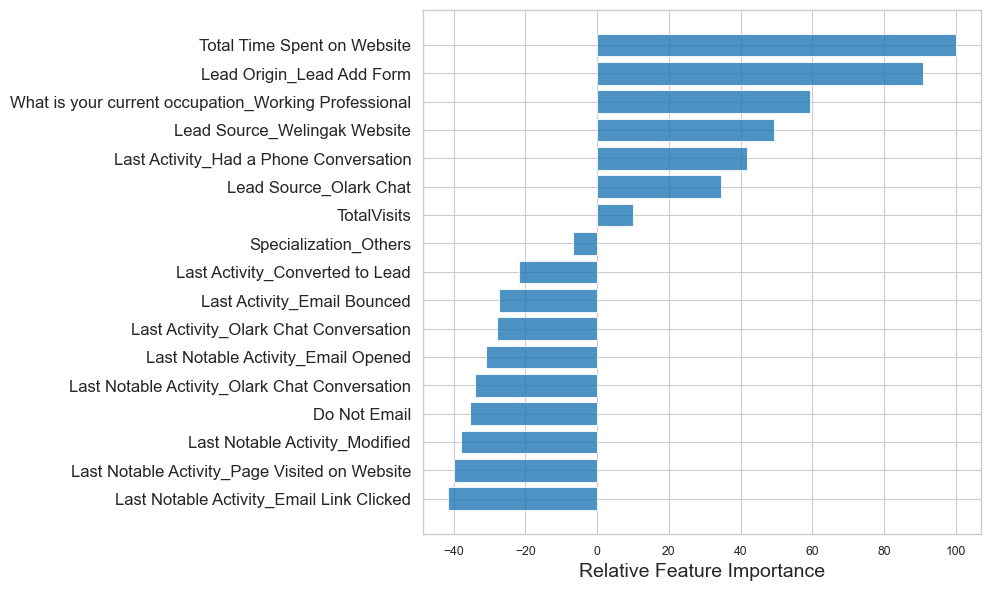

In [590]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col4].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

# Final Insights for Sales team:
- The sales team of the X-Education should focus on the leads having lead origin: lead add form, occupation: Working Professional, Lead source: Wellingak website.
- Hot Leads are identified as Customers having lead score above 35. Sales Team of the company should first focus on the Hot Leads.
- There are many important variables like city, specialization, occupation which can potentially explain Conversion better. It is important for the management to make
 few of these information mandatory to fill, so that we can use in our model and suggest more important decisions for the business.
- High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on 
 the brink of the probability of getting Converted or not are not selected.
- If the Last Notable Activity is Modified, he/she may not be the potential lead.